In [5]:
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

zsh:1: no matches found: https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_


In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from matplotlib.font_manager import fontManager as font_manager
from matplotlib.font_manager import FontProperties

zh_font=mpl.font_manager.FontProperties(fname=r'/content/TaipeiSansTCBeta-Regular.ttf')

%matplotlib inline
pd.options.mode.chained_assignment = None

mpl.matplotlib_fname()

In [ ]:
data = spark_df.toPandas()
data['交易年月日'] = data['交易年月日'].astype('datetime64[ns]')
data['year'] = data['交易年月日'].dt.year
data['month'] = data['交易年月日'].dt.month

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49642 entries, 0 to 49641
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   鄉鎮市區           49642 non-null  object        
 1   交易標的           49642 non-null  object        
 2   土地位置建物門牌       49642 non-null  object        
 3   土地移轉總面積平方公尺    49642 non-null  object        
 4   都市土地使用分區       44736 non-null  object        
 5   非都市土地使用分區      4519 non-null   object        
 6   非都市土地使用編定      4515 non-null   object        
 7   交易年月日          49642 non-null  datetime64[ns]
 8   交易筆棟數          49642 non-null  object        
 9   移轉層次           41046 non-null  object        
 10  總樓層數           41023 non-null  object        
 11  建物型態           49642 non-null  object        
 12  主要用途           39593 non-null  object        
 13  主要建材           41035 non-null  object        
 14  建築完成年月         40092 non-null  object        
 15  建物移轉總面積平方公尺    4964

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

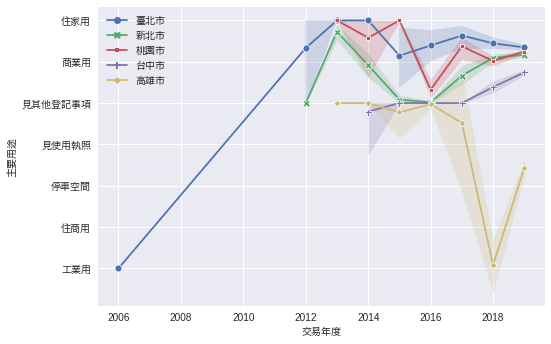

In [43]:
sns.lineplot(x="year", y="主要用途",hue="city", data=data, style="city", 
            markers=True, dashes=False, ci=100)
plt.style.use('seaborn') 
plt.legend(prop=zh_font)
plt.yticks(fontProperties = zh_font)
plt.xlabel("交易年度", fontProperties = zh_font)
plt.ylabel("主要用途", fontProperties = zh_font) 
plt.savefig('city_txn_reason.png')
files.download("city_txn_reason.png") 